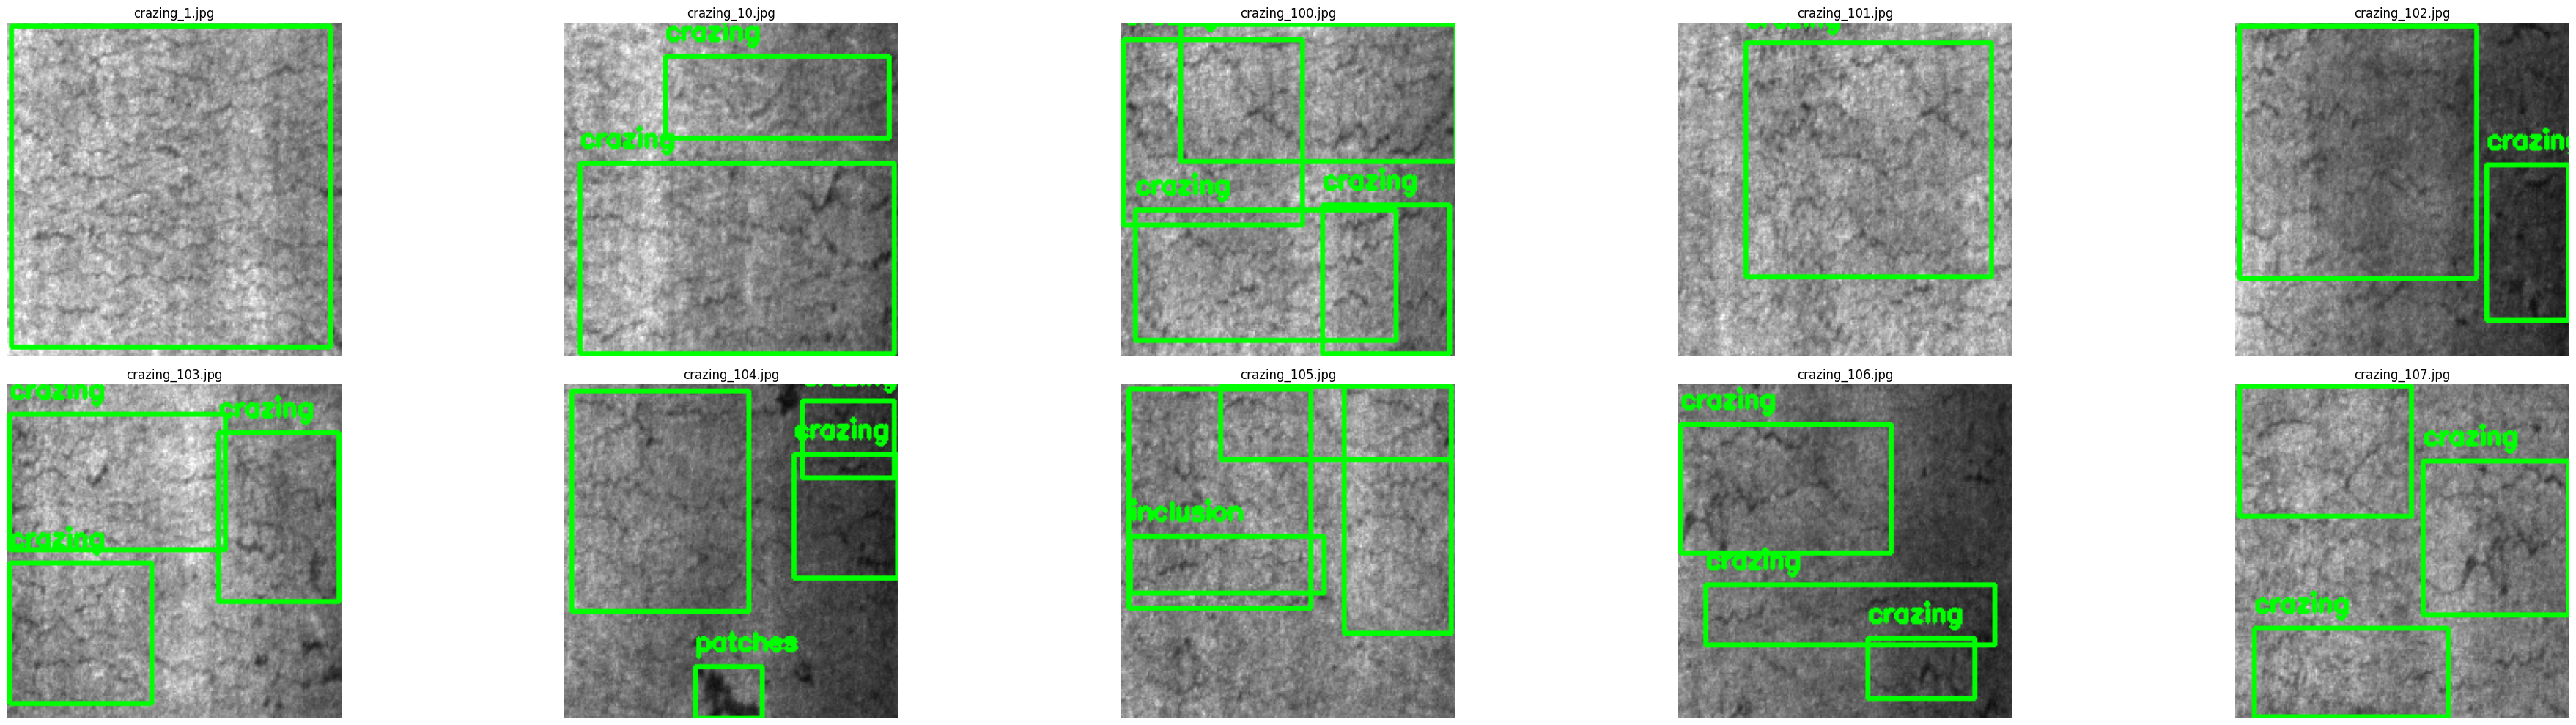

In [24]:
import cv2
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Paths to image and label folders
image_folder = "NEU-DET/NEU-DET/IMAGES"
label_folder = "NEU-DET/NEU-DET/ANNOTATIONS"

# Get the list of image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])[:10]

# Function to parse XML and extract bounding boxes
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = []
    
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        bndbox = obj.find("bndbox")
        
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        boxes.append((class_name, xmin, ymin, xmax, ymax))
    
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    
    # Read XML label file
    if os.path.exists(label_path):
        boxes = parse_xml(label_path)
        
        for class_name, xmin, ymin, xmax, ymax in boxes:
            # Draw bounding box
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

# Display the first 10 images with bounding boxes
plt.figure(figsize=(40, 10))

for idx, img_file in enumerate(image_files):
    img_path = os.path.join(image_folder, img_file)
    label_path = os.path.join(label_folder, os.path.splitext(img_file)[0] + ".xml")

    # Draw bounding boxes on the image
    image_with_boxes = draw_bounding_boxes(img_path, label_path)
    image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    plt.subplot(2, 5, idx + 1)
    plt.imshow(image_with_boxes)
    plt.title(img_file)
    plt.axis("off")

plt.tight_layout()
plt.show()


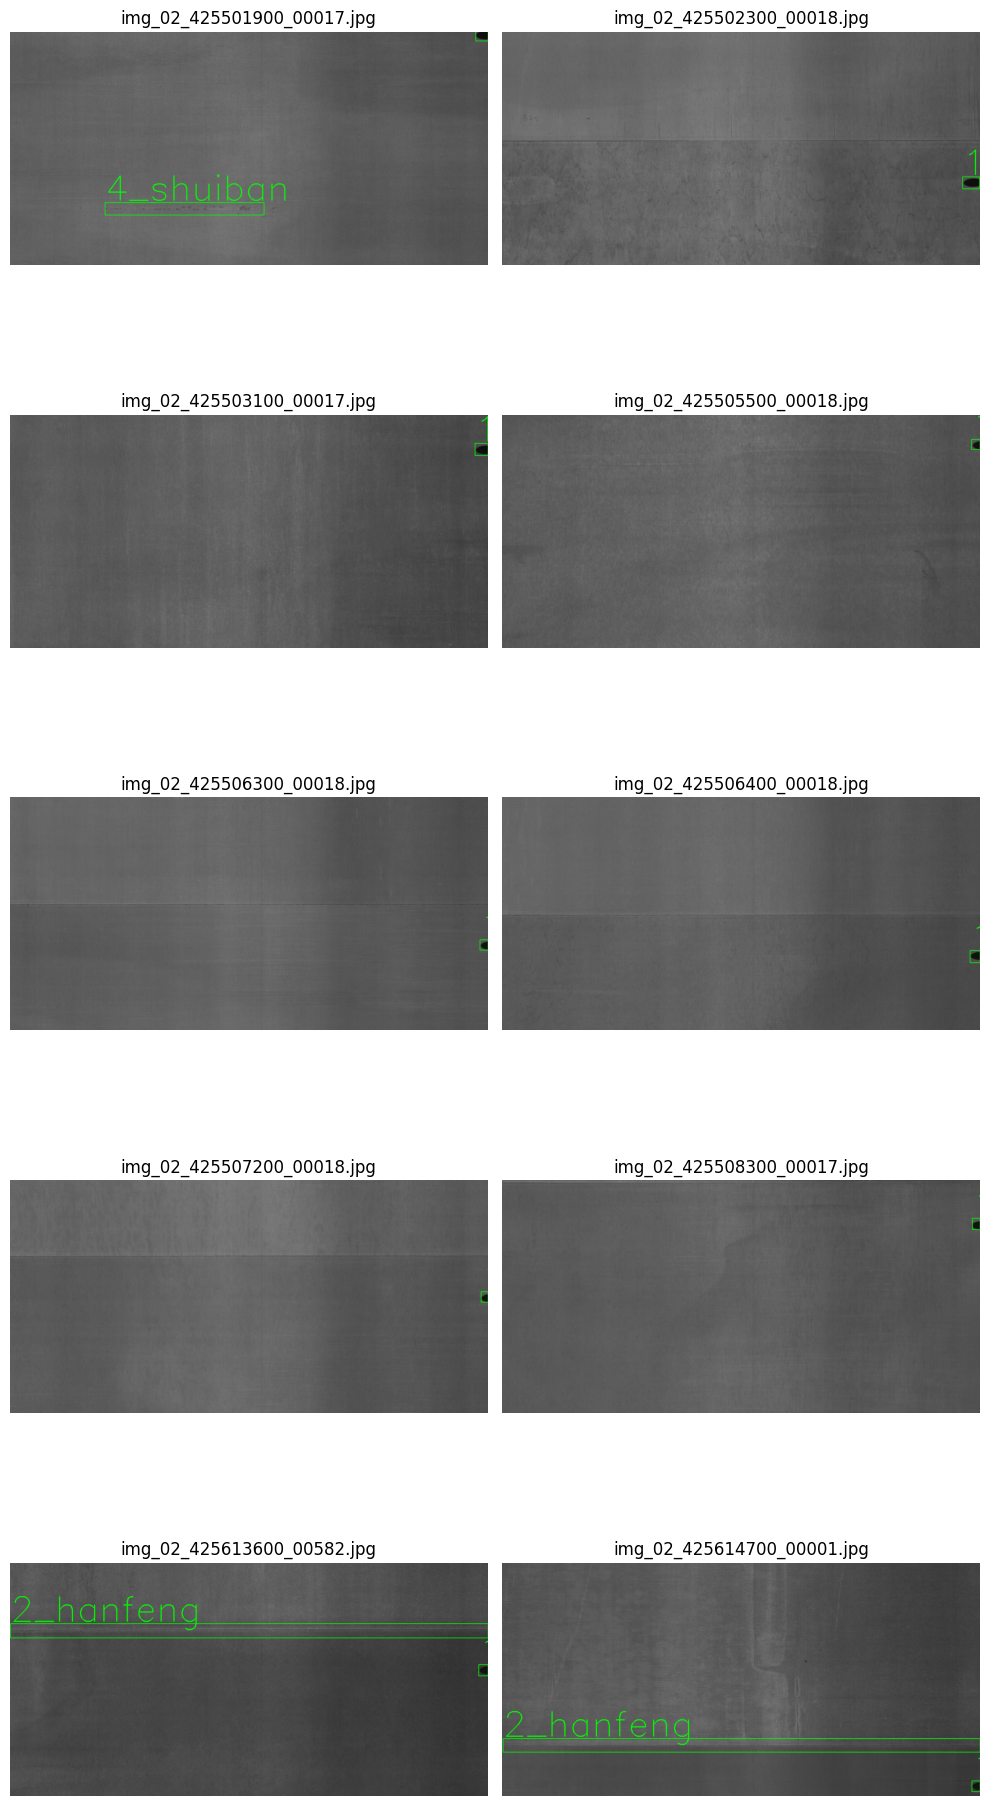

In [21]:
import cv2
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Paths to image and label folders
image_folder = "archive (2)/1"
label_folder = "archive (2)/lable"

# Get the list of image files
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))])[:10]

# Function to parse XML and extract bounding boxes
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    boxes = []
    
    for obj in root.findall("object"):
        class_name = obj.find("name").text
        bndbox = obj.find("bndbox")
        
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        
        boxes.append((class_name, xmin, ymin, xmax, ymax))
    
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    
    # Read XML label file
    if os.path.exists(label_path):
        boxes = parse_xml(label_path)
        
        for class_name, xmin, ymin, xmax, ymax in boxes:
            # Draw bounding box
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 255, 0), 3)

    return image

# Display the first 10 images with bounding boxes
plt.figure(figsize=(10, 20))

for idx, img_file in enumerate(image_files):
    img_path = os.path.join(image_folder, img_file)
    label_path = os.path.join(label_folder, os.path.splitext(img_file)[0] + ".xml")

    # Draw bounding boxes on the image
    image_with_boxes = draw_bounding_boxes(img_path, label_path)
    image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    plt.subplot(5, 2, idx + 1)
    plt.imshow(image_with_boxes)
    plt.title(img_file)
    plt.axis("off")

plt.tight_layout()
plt.show()
